In [1]:

import os
import fitz  # PyMuPDF

# Set path to your syllabus folder
syllabus_folder = "Syllabi0_8" #current folder
syllabus_texts = {}

# Loop through each PDF file in the directory
for filename in os.listdir(syllabus_folder):
    if filename.lower().endswith(".pdf"):
        filepath = os.path.join(syllabus_folder, filename)
        try:
            doc = fitz.open(filepath)
            text = ""
            for page in doc:
                text += page.get_text()
            syllabus_texts[filename] = text
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Print how many PDFs were processed
print(f"Processed {len(syllabus_texts)} PDF files.")

# Preview the first file's content (optional)
first_file = list(syllabus_texts.keys())[0]
print(f"\nFirst file: {first_file}")
print(syllabus_texts[first_file][:1000])  # first 1000 characters

#save each syllabus as a .txt file
output_folder = "txt_syllabi"
os.makedirs(output_folder, exist_ok=True)

for filename, text in syllabus_texts.items():
    txt_filename = os.path.splitext(filename)[0] + ".txt"
    with open(os.path.join(output_folder, txt_filename), "w", encoding="utf-8") as f:
        f.write(text)


Processed 107 PDF files.

First file: 01109-EC_Corporate-Finance-Syllabus.pdf
 
 
© Chartered Professional Accountants of Canada. All rights reserved. 
No part of this publication may be reproduced or transmitted, in any form or by any means, without the prior written consent of CPA Canada. 
For information regarding permissions, please contact permissions@cpacanada.ca.  
2023-08-24 
SYLLABUS 
CPA PREPARATORY COURSES 
Corporate Finance 
CPA Preparatory Courses — Syllabus 
 
Corporate Finance 
 
1 / 6 
Purpose 
The purpose of this syllabus is to provide information about the Corporate Finance CPA 
preparatory course. This document has been produced for education administrators, 
course authors, course examiners, committee members, and resource people in the 
CPA education system; current and potential students and those who advise them; and 
others in the professional, academic, and general community. 
Course Overview 
Course description 
This six-week core course introduces you to fina

### Data Cleaning

In [34]:
# NLTK setup
import re
import os
import nltk
from collections import Counter
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stop_words.update({"student", "grade", "academic", "assessment", "course", \
                   "syllabus", "learning", "outcome", "objective", "requirement","exam", \
                   'credit', 'risk', 'management', 'statement', 'cash', 'dividend', 'asset', \
                   'assignment', 'description', 'course', 'concept', 'introduction', \
                   'examination', 'objectives','students', 'evaluation', 'analysis', 'table', \
                   'cash flow', 'class', 'examine', 'project', 'chapter', 'week', 'material', \
                   'instructor', 'lecture', 'information', 'university', 'quiz', 'question', 'email', 'assignments'})
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"<.*?>", " ", text)  # Remove HTML tags
    text = text.lower()
    tokens = text.split()
    tokens = [re.sub(r"[^a-zA-Z\s]", "", word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return " ".join(tokens).strip()

# Step 1: Load and clean syllabi text
text_folder = "txt_syllabi"
syllabus_texts = {}

for filename in os.listdir(text_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(text_folder, filename), "r", encoding="utf-8") as f:
            raw_text = f.read()
            cleaned_text = clean_text(raw_text)
            syllabus_texts[filename] = cleaned_text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17844\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\17844\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
# frequency
from collections import Counter

all_words = " ".join(syllabus_texts.values()).split()
word_counts = Counter(all_words)

top_n = 20
print(f"\nTop {top_n} most frequent words across syllabi:") 
for word, count in word_counts.most_common(top_n):
    print(f"{word}: {count}")   


Top 20 most frequent words across syllabi:
financial: 1325
finance: 600
accounting: 597
business: 544
may: 475
capital: 462
work: 450
final: 432
policy: 420
time: 408
case: 399
use: 388
please: 341
personal: 325
required: 311
value: 310
must: 303
investment: 301
understand: 300
decision: 299


In [37]:
# common 
from collections import defaultdict
# Dictionary to track which files each word appears in
word_to_files = defaultdict(set)
for filename, text in syllabus_texts.items():
    words = set(text.split())  # use set to avoid double-counting same word in same file
    for word in words:
        word_to_files[word].add(filename)
# Count how many syllabi each word appears in
word_common_across_files = {word: len(files) for word, files in word_to_files.items()}
# Sort and show top shared words
top_n = 20
top_shared = sorted(word_common_across_files.items(), key=lambda x: x[1], reverse=True)[:top_n]
print(f"\n Top {top_n} most common words across different syllabi:")
for word, count in top_shared:
    print(f"{word}: {count} syllabi")   


 Top 20 most common words across different syllabi:
financial: 98 syllabi
time: 82 syllabi
finance: 80 syllabi
business: 78 syllabi
use: 76 syllabi
topic: 74 syllabi
required: 74 syllabi
policy: 74 syllabi
work: 73 syllabi
final: 73 syllabi
hour: 71 syllabi
may: 70 syllabi
one: 69 syllabi
basic: 69 syllabi
flow: 68 syllabi
content: 68 syllabi
value: 67 syllabi
understand: 66 syllabi
note: 66 syllabi
capital: 65 syllabi


### Model1


✅ TF-IDF shape: (107, 8267)


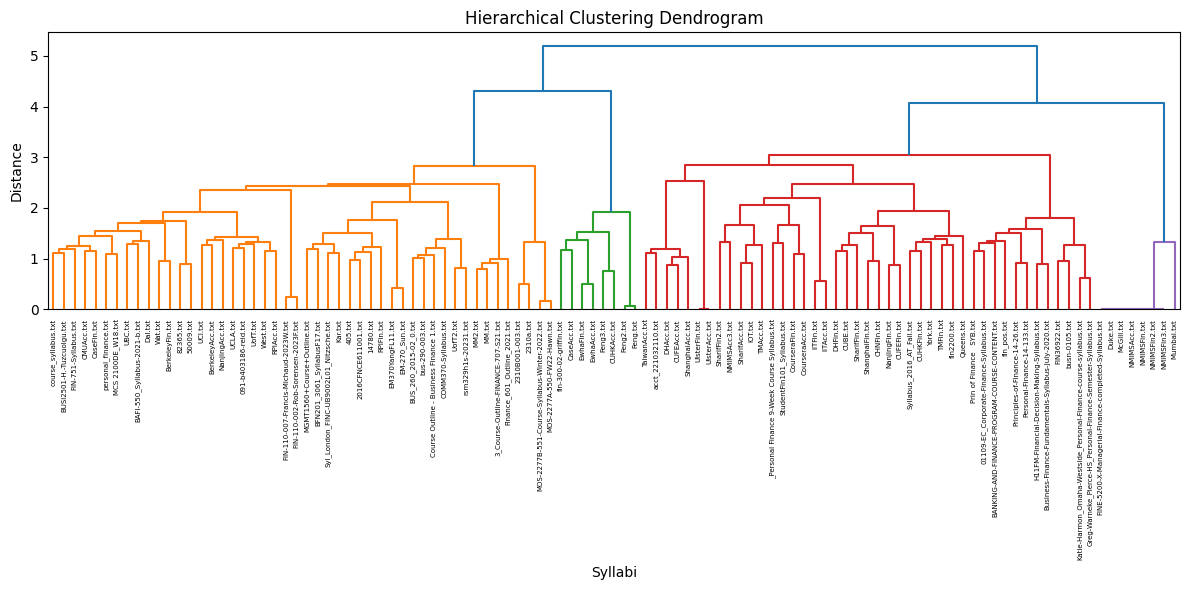


📂 Cluster Assignments:
01109-EC_Corporate-Finance-Syllabus.txt: Cluster 1
091-b403186-reid.txt: Cluster 3
14780.txt: Cluster 3
2016CFNCE611001.txt: Cluster 3
2310a.txt: Cluster 3
2310B001-003.txt: Cluster 3
3_Course-Outline-FINANCE-707-S21.txt: Cluster 3
405.txt: Cluster 3
50009.txt: Cluster 3
82365.txt: Cluster 3
acct_221032110.txt: Cluster 1
BAFI-550_Syllabus-2021-b.txt: Cluster 3
BANKING-AND-FINANCE-PROGRAM-COURSE-CONTENT.txt: Cluster 1
BerkeleyAcc.txt: Cluster 3
BerkeleyFin.txt: Cluster 3
BFN201_3061_SyllabusF17.txt: Cluster 3
bus-290-003.txt: Cluster 3
BUSI2501-H.-Tuzcuolgu.txt: Cluster 3
Business-Finance-Fundamentals-Syllabus-July-2020.txt: Cluster 1
busn-0105.txt: Cluster 1
BUS_260_2015-02_0.txt: Cluster 3
CaseAcc.txt: Cluster 2
CaseFin.txt: Cluster 3
CHNFin.txt: Cluster 1
CMUAcc.txt: Cluster 3
COMM370-Syllabus.txt: Cluster 3
Course Outline - Business Finance 1.txt: Cluster 3
CourseraAcc.txt: Cluster 1
CourseraFin.txt: Cluster 1
course_syllabus.txt: Cluster 3
CUBE.txt: Cluster 

In [ ]:

import os
import re
import fitz  # PyMuPDF
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# TF-IDF vectorization
documents = list(syllabus_texts.values())
filenames = list(syllabus_texts.keys())

vectorizer = TfidfVectorizer(
    stop_words='english',
    min_df=0., max_df=1.,
    norm='l2',
    use_idf=True,
    smooth_idf=True
)
X = vectorizer.fit_transform(documents).toarray()
print(f"\n TF-IDF shape: {X.shape}")

similarity_matrix = cosine_similarity(X)    

# Hierarchical clustering
linked = linkage(similarity_matrix, method='ward')  # 'ward' minimizes variance

# Dendrogram visualization
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    labels=filenames,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Syllabi")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Assign cluster labels
cluster_labels = fcluster(linked, t=4.2, criterion='distance')
print("\n📂 Cluster Assignments:")
for fname, label in zip(filenames, cluster_labels):
    print(f"{fname}: Cluster {label}")

In [39]:
unique_clusters = set(cluster_labels)
print(f"✅ Number of clusters: {len(unique_clusters)}")
print(f"🧾 Cluster labels: {sorted(unique_clusters)}")

✅ Number of clusters: 3
🧾 Cluster labels: [1, 2, 3]


In [40]:
from collections import defaultdict

# Organize files by cluster label
cluster_to_files = defaultdict(list)
for file, label in zip(filenames, cluster_labels):
    cluster_to_files[label].append(file)

# Print 10 files from each of the first 3 clusters
for cluster_id in sorted(cluster_to_files.keys())[:3]:
    print(f"\n📁 Cluster {cluster_id} (showing 10 files):")
    for file in cluster_to_files[cluster_id][:10]:
        print(f"  - {file}")


📁 Cluster 1 (showing 10 files):
  - 01109-EC_Corporate-Finance-Syllabus.txt
  - acct_221032110.txt
  - BANKING-AND-FINANCE-PROGRAM-COURSE-CONTENT.txt
  - Business-Finance-Fundamentals-Syllabus-July-2020.txt
  - busn-0105.txt
  - CHNFin.txt
  - CourseraAcc.txt
  - CourseraFin.txt
  - CUBE.txt
  - CUFEAcc.txt

📁 Cluster 2 (showing 10 files):
  - CaseAcc.txt
  - CUHKAcc.txt
  - EwhaAcc.txt
  - EwhaFin.txt
  - Feng.txt
  - Feng2.txt
  - Feng3.txt
  - fin-300-02-griffin.txt

📁 Cluster 3 (showing 10 files):
  - 091-b403186-reid.txt
  - 14780.txt
  - 2016CFNCE611001.txt
  - 2310a.txt
  - 2310B001-003.txt
  - 3_Course-Outline-FINANCE-707-S21.txt
  - 405.txt
  - 50009.txt
  - 82365.txt
  - BAFI-550_Syllabus-2021-b.txt


In [41]:
from collections import Counter

# Count how many syllabi in each cluster
cluster_counts = Counter(cluster_labels)
print("\n📊 Cluster Sizes:")
for cluster_id, count in sorted(cluster_counts.items()):
    print(f"Cluster {cluster_id}: {count} syllabi")


📊 Cluster Sizes:
Cluster 1: 51 syllabi
Cluster 2: 8 syllabi
Cluster 3: 48 syllabi


### Model 2

In [45]:
import os
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Define keyword sets
accounting_keywords = [
    "audit", "ifrs", "financial reporting", "gaap", "ledger", "accounting", "cost accounting", "managerial accounting", "financial accounting", "management accounting",
    "inventory", "inventories", "accounts payable", "accounting cycle", 'ACC', 'Acc', 
    "balance sheet", "depreciation", "journal entry", "internal control"
]

finance_keywords = [
    "portfolio", "investment", "return", "valuation", "stocks", "bonds", "capital", "interest rate", "portfolio risk", "excess return", "tvm", "time value of money",
    "capital budgeting", "corporate finance", "dividends", "npv", "irr", "financial market", "market", "wacc", "annuity", "mergers", "acquisitions", "dcf", "fin", 'finance'
]

# 3. TF-IDF vectorization
documents = list(syllabus_texts.values())
filenames = list(syllabus_texts.keys())

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.85, min_df=1)
X = vectorizer.fit_transform(documents).toarray()

# 4. Find reference docs with high keyword match
def count_hits(text, keywords):
    return sum(1 for kw in keywords if kw in text.lower())

reference_acc = [i for i, doc in enumerate(documents) if count_hits(doc, accounting_keywords) >= 3]
reference_fin = [i for i, doc in enumerate(documents) if count_hits(doc, finance_keywords) >= 3]

# 5. Average vector for each category
acc_vector = np.mean(X[reference_acc], axis=0)
fin_vector = np.mean(X[reference_fin], axis=0)

# 6. Classify based on cosine similarity
classified = {}
for i, vec in enumerate(X):
    sim_acc = cosine_similarity([vec], [acc_vector])[0][0]
    sim_fin = cosine_similarity([vec], [fin_vector])[0][0]

    if max(sim_acc, sim_fin) == 0:
        label = "Outlier"
    elif sim_acc > sim_fin:
        label = "Accounting"
    elif sim_fin > sim_acc:
        label = "Finance"

    
    classified[filenames[i]] = label

# 7. Print summary
print("📊 Category Counts:", Counter(classified.values()))
print("\n🔍 Sample Classification:")
for file, label in list(classified.items())[:30]:
    print(f"{file}: {label}")

# 8. Save results to a text file
with open("classification_results.txt", "w", encoding="utf-8") as f:
    f.write("Filename\tPredicted Category\n")
    for file, label in classified.items():
        f.write(f"{file}\t{label}\n")

📊 Category Counts: Counter({'Finance': 73, 'Accounting': 27, 'Outlier': 7})

🔍 Sample Classification:
01109-EC_Corporate-Finance-Syllabus.txt: Finance
091-b403186-reid.txt: Finance
14780.txt: Finance
2016CFNCE611001.txt: Finance
2310a.txt: Finance
2310B001-003.txt: Finance
3_Course-Outline-FINANCE-707-S21.txt: Finance
405.txt: Finance
50009.txt: Finance
82365.txt: Finance
acct_221032110.txt: Accounting
BAFI-550_Syllabus-2021-b.txt: Finance
BANKING-AND-FINANCE-PROGRAM-COURSE-CONTENT.txt: Finance
BerkeleyAcc.txt: Accounting
BerkeleyFin.txt: Finance
BFN201_3061_SyllabusF17.txt: Finance
bus-290-003.txt: Finance
BUSI2501-H.-Tuzcuolgu.txt: Finance
Business-Finance-Fundamentals-Syllabus-July-2020.txt: Finance
busn-0105.txt: Finance
BUS_260_2015-02_0.txt: Finance
CaseAcc.txt: Accounting
CaseFin.txt: Finance
CHNFin.txt: Finance
CMUAcc.txt: Accounting
COMM370-Syllabus.txt: Finance
Course Outline - Business Finance 1.txt: Finance
CourseraAcc.txt: Accounting
CourseraFin.txt: Finance
course_syllabu

### Topic Modelling - LDA

In [46]:

import os
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

documents = list(syllabus_texts.values())
filenames = list(syllabus_texts.keys())

# Step 2: Vectorize the documents
vectorizer = CountVectorizer(max_df=0.85, min_df=2, stop_words='english')
cv_features = vectorizer.fit_transform(documents)

# Step 3: Fit the LDA model
TOTAL_TOPICS = 3  # change this if you want more topics
lda_model = LatentDirichletAllocation(
    n_components=TOTAL_TOPICS,
    max_iter=500,
    max_doc_update_iter=50,
    learning_method='online',
    batch_size=len(documents),
    learning_offset=50.,
    random_state=42,
    n_jobs=-1
)

document_topics = lda_model.fit_transform(cv_features)
topic_terms = lda_model.components_

# Step 4: Extract top terms per topic
vocabulary = vectorizer.get_feature_names_out()
top_terms = 10

topic_key_term_idxs = np.argsort(-np.abs(topic_terms), axis=1)[:, :top_terms]
topic_keyterms = vocabulary[topic_key_term_idxs]
topics = [' , '.join(topic) for topic in topic_keyterms]

# Print topics
print("\n Topics Discovered:")
for i, t in enumerate(topics):
    print(f"Topic {i}: {t}")

# Optional: visualize documents' topic distribution
dt_df = pd.DataFrame(document_topics, columns=[f"T{i}" for i in range(1, TOTAL_TOPICS + 1)])
dt_df["Filename"] = filenames
print("\n Topic distribution per document:")
print(dt_df.head(10))


 Topics Discovered:
Topic 0: accounting , business , personal , cost , demonstrate , investment , identify , skill , income , tax
Topic 1: understand , market , money , policy , section , rate , monetary , master , development , college
Topic 2: finance , final , case , time , work , capital , use , policy , business , required

 Topic distribution per document:
         T1        T2        T3                                 Filename
0  0.639916  0.001044  0.359040  01109-EC_Corporate-Finance-Syllabus.txt
1  0.192691  0.031028  0.776280                     091-b403186-reid.txt
2  0.146372  0.000288  0.853340                                14780.txt
3  0.058197  0.031863  0.909940                      2016CFNCE611001.txt
4  0.000275  0.000267  0.999458                                2310a.txt
5  0.000216  0.000211  0.999573                         2310B001-003.txt
6  0.000534  0.000507  0.998959     3_Course-Outline-FINANCE-707-S21.txt
7  0.255462  0.004486  0.740053                   

In [ ]:
from sklearn.decomposition import TruncatedSVD

TOTAL_TOPICS = 2
lsi_model = TruncatedSVD(n_components=TOTAL_TOPICS, n_iter=500, random_state=42)
document_topics = lsi_model.fit_transform(cv_features)
topic_terms = lsi_model.components_
topic_terms.shape

top_terms = 20
topic_key_term_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:, :top_terms]
topic_keyterm_weights = np.array([topic_terms[row, columns]
                                  for row, columns in
                                  list(zip(np.arange(TOTAL_TOPICS), topic_key_term_idxs))])
topic_keyterms = vocabulary[topic_key_term_idxs]
topic_keyterms_weights = list(zip(topic_keyterms, topic_keyterm_weights))


                              
for n in range(TOTAL_TOPICS):
    print('Topic #' + str(n + 1) + ':')
    print('=' * 50)

# Get the terms and weights for this topic
    terms, weights = topic_keyterms_weights[n]
# Sort the terms by the absolute value of their weights in descending order
    term_weights = sorted([(t, w) for t, w in zip(terms, weights)],
                          key=lambda row: -abs(row[1]))
# Prepare the list with rounded weights for better readability
    top_terms_list = [(term, round(wt, 3)) for term, wt in term_weights]
    print('Top terms:', top_terms_list)
    print('-' * 50)
    print()

dt_df = pd.DataFrame(np.round(document_topics, 3),
columns=['Topic'+str(i) for i in range(1, TOTAL_TOPICS+1)])
print(dt_df.head(10))



Topic #1:
Top terms: [('demonstrate', 0.283), ('personal', 0.233), ('skill', 0.22), ('business', 0.217), ('identify', 0.21), ('accounting', 0.203), ('fin', 0.202), ('work', 0.186), ('andor', 0.131), ('performance', 0.13), ('investment', 0.119), ('tax', 0.117), ('education', 0.107), ('canada', 0.104), ('goal', 0.103), ('income', 0.098), ('capital', 0.093), ('bit', 0.092), ('value', 0.091), ('advanced', 0.09)]
--------------------------------------------------

Topic #2:
Top terms: [('demonstrate', 0.229), ('understand', -0.215), ('case', -0.184), ('fin', 0.183), ('identify', 0.172), ('section', -0.169), ('finance', -0.16), ('policy', -0.158), ('skill', 0.154), ('personal', 0.129), ('money', -0.122), ('reading', -0.121), ('time', -0.118), ('online', -0.114), ('note', -0.112), ('module', -0.106), ('capital', -0.1), ('pm', -0.099), ('hour', -0.099), ('rate', -0.097)]
--------------------------------------------------

   Topic1  Topic2
0  17.524 -14.315
1  12.847 -14.369
2  33.438 -37.350
